In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Tina Bhadekar'

In [4]:
os.chdir(r'C:\Users\Tina Bhadekar\OneDrive\Desktop\Edupristine -linear regression')

In [5]:
train=pd.read_csv('Titanic.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Missing data

In [7]:
train.isnull()
# true tells yes null values are present

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# the above information we are enable to make it so we draw a heat map for better understanding

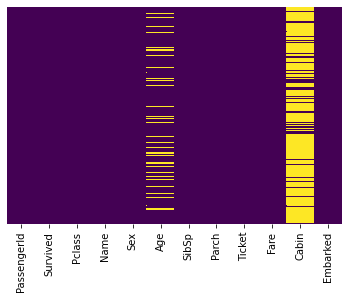

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# here we are saying Y axis as false as all rows are taken and x axis not mention meand by default it takes all columns
# cbar is the measure which shows at the end and camp is used for the color

In [ ]:
## cabin has lot null value and seems not to be useful and in age nearly 20% data is missing we shall do some imputation
#before that lets continue on visualizing more data

In [9]:
sns.set_style('whitegrid')

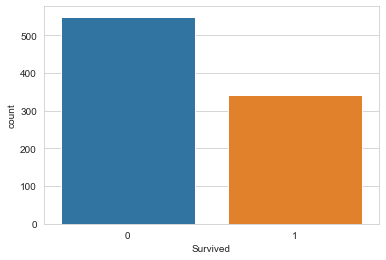

In [10]:
sns.countplot(x='Survived',data=train)

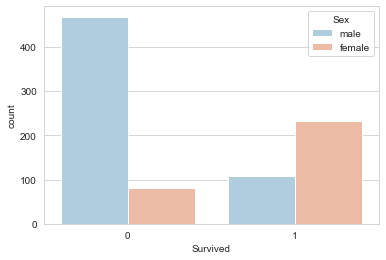

In [11]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

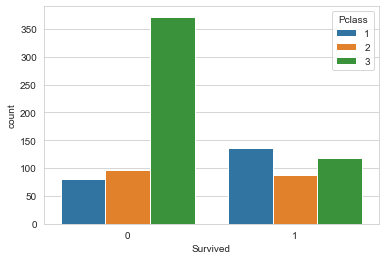

In [41]:
sns.countplot(x='Survived',hue='Pclass',data=train)

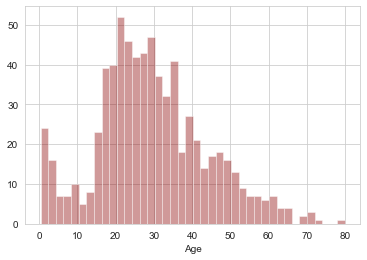

In [44]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

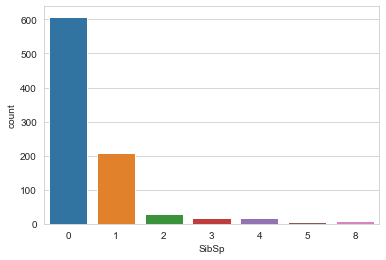

In [45]:
sns.countplot(x='SibSp',data=train)

In [ ]:
# average fare

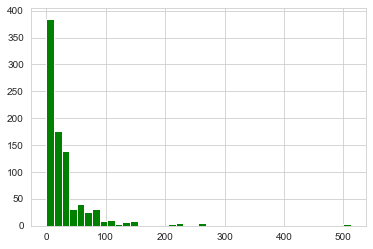

In [47]:
train['Fare'].hist(color='green',bins=40)

In [ ]:
### removing the null values 

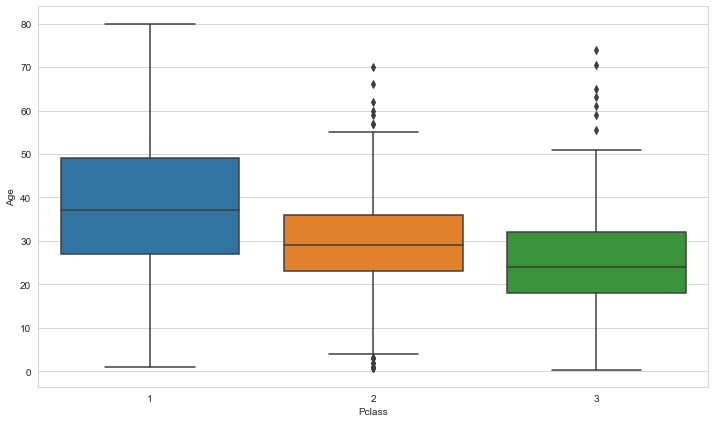

In [50]:
plt.figure(figsize=(12,7))  # wider scale
sns.boxplot(x='Pclass',y='Age',data=train)

In [ ]:
# There was relation between Pclass and age so instaed of dropping I used mean value in stead of null value

In [72]:
def imputeage(col):
    Age=col[0]
    Pclass=col[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
## apply this function in existing data set

In [75]:
train['Age']=train[['Age','Pclass']].apply(imputeage,axis=1)

In [ ]:
# checking again for null values

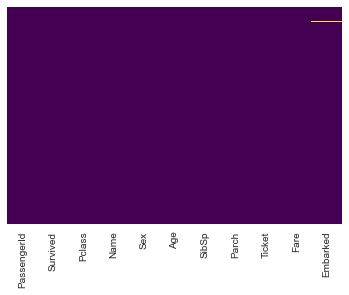

In [88]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# many null values so lets drop the cabin

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [92]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S


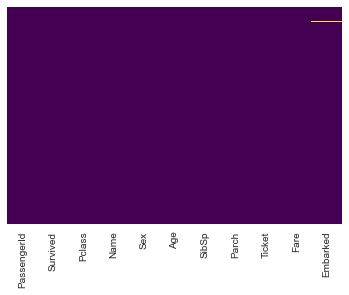

In [93]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# converting Categorial features in to 0 1

In [95]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [98]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [99]:
# We are dropping all categorial variable and later we shall append sex and embark column
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [100]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,24,1,0,7.2500
1,2,1,1,37,1,0,71.2833
2,3,1,3,24,0,0,7.9250
3,4,1,1,37,1,0,53.1000
4,5,0,3,24,0,0,8.0500


In [ ]:
# concate the sex and embark with train

In [101]:
train=pd.concat([train,sex,embark],axis=1)

In [102]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24,1,0,7.2500,1,0,1
1,2,1,1,37,1,0,71.2833,0,0,0
2,3,1,3,24,0,0,7.9250,0,0,1
3,4,1,1,37,1,0,53.1000,0,0,1
4,5,0,3,24,0,0,8.0500,1,0,1


In [ ]:
### we have found Survived is our dependent on all other factors

In [ ]:
#Logistic regression model ### Train test split

In [103]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,24,1,0,7.2500,1,0,1
1,2,1,37,1,0,71.2833,0,0,0
2,3,3,24,0,0,7.9250,0,0,1
3,4,1,37,1,0,53.1000,0,0,1
4,5,3,24,0,0,8.0500,1,0,1


In [104]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [124]:
from sklearn.model_selection import train_test_split

In [136]:
X_train,X_test,y_train,y_test= train_test_split(train.drop('Survived',axis=1),
                                              train['Survived'], test_size=.30,
                                              random_state=101)

In [ ]:
# Training and Predicting

In [137]:
from sklearn.linear_model import LogisticRegression 

In [138]:
logmodel = LogisticRegression()

In [140]:
logmodel.fit(X_train,y_train)

C:\Users\Tina Bhadekar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [141]:
predictions = logmodel.predict(X_test)

In [143]:
from sklearn.metrics import confusion_matrix

In [144]:
accuracy=confusion_matrix(y_test,predictions)

In [145]:
accuracy

array([[134,  20],
       [ 40,  74]], dtype=int64)

In [147]:
from sklearn.metrics import accuracy_score

In [148]:
accuracy=accuracy_score(y_test,predictions)

In [149]:
accuracy

0.7761194029850746

In [150]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)